In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pylab
import math
import sys
import operator
import inspect
import lmfit
from lmfit import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal
from scipy import fftpack
from scipy.integrate import trapz
from operator import itemgetter
from skimage import util
from scipy import stats
from numpy import NaN, Inf, arange, isscalar, asarray, array

def line2(x, slope, intercept):
    """a line"""
    return slope*x+intercept

In [2]:
%store -r w7x_te
%store -r w7x_te_n
%store -r w7x_zet
%store -r w7x_sigma
%store -r w7x_zf_nl
%store -r w7x_zf
w7x_te = np.array(w7x_te)
w7x_te_n = np.array(w7x_te_n)
w7x_zet = np.array(w7x_zet)
w7x_sigma = np.array(w7x_sigma)
w7x_zf_nl = np.array(w7x_zf_nl)
w7x_zf = np.array(w7x_zf)

the slope is: 5.0649076401872355


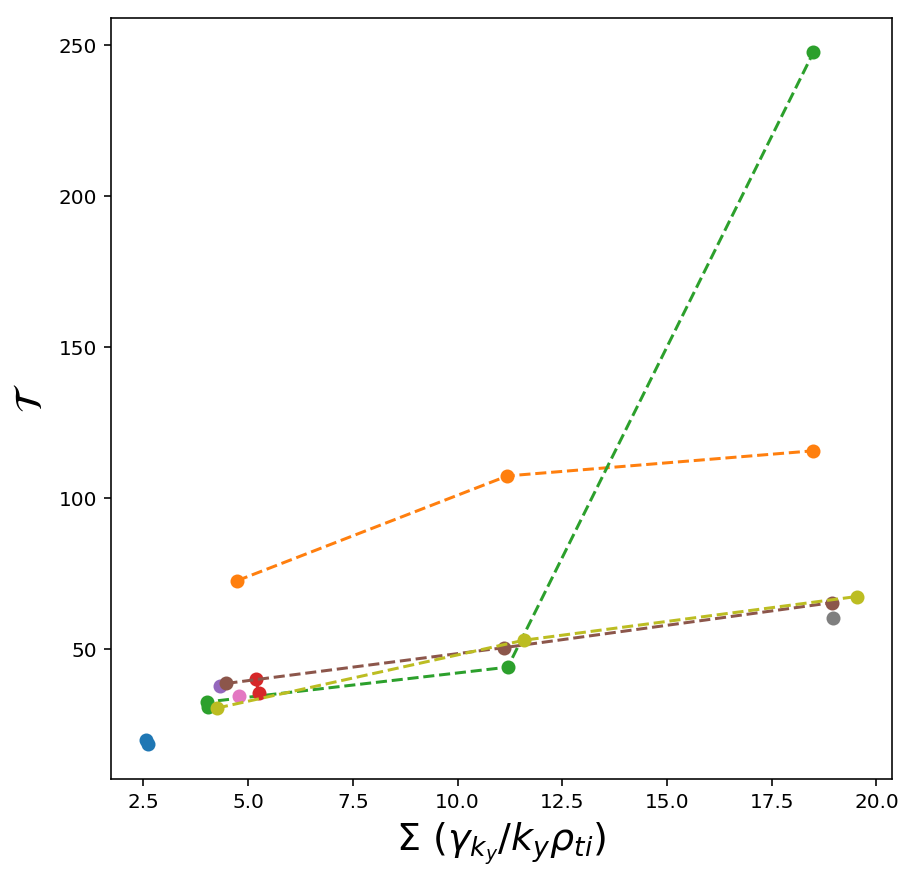

the slope is: -141842.74604851104


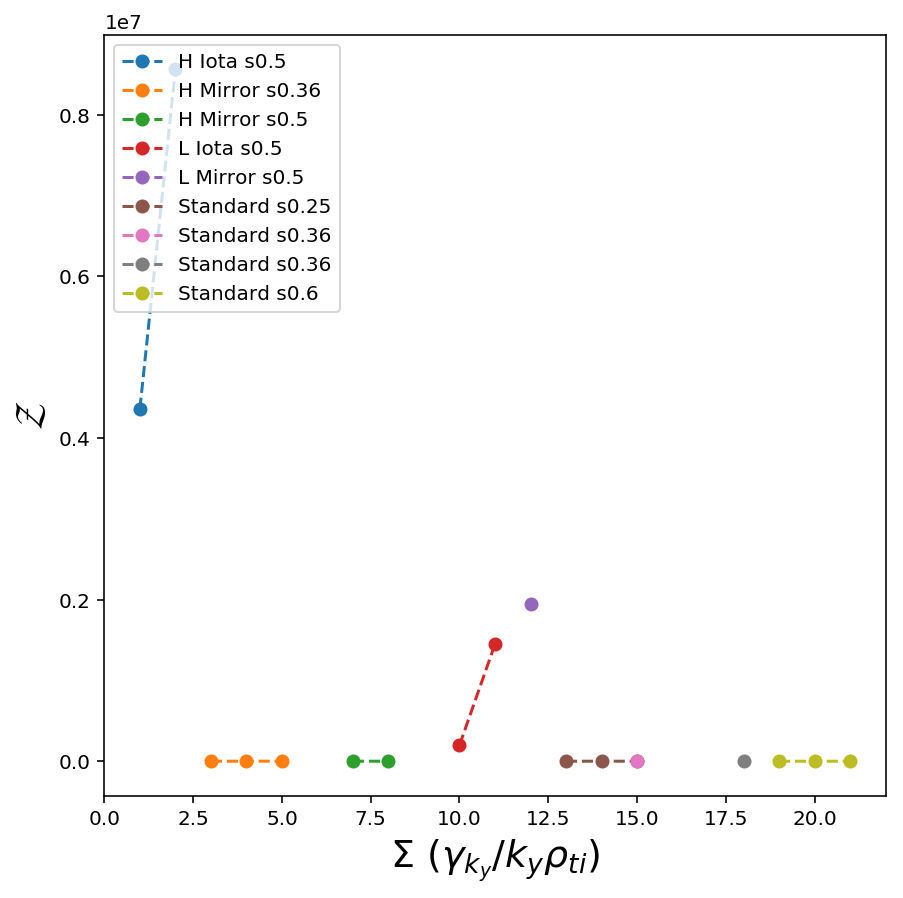

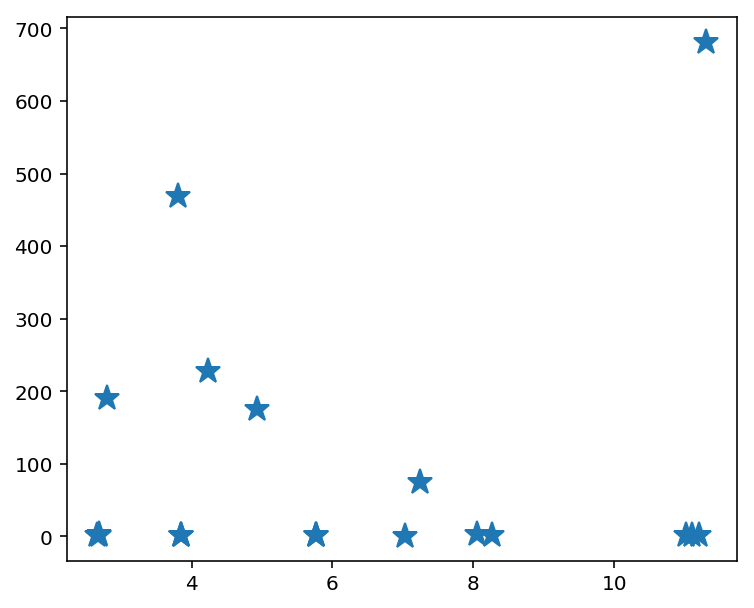

In [5]:
kekky0 = np.array([6, 7, 12, 13, 14, 15, 17, 18, 19, 20])
slope_w7x, intercept, r_value, p_value, std_err = stats.linregress(w7x_sigma, w7x_te)
slope_w7x_n, intercept, r_value, p_value, std_err = stats.linregress(w7x_sigma, w7x_zet)

plt.figure(figsize=(7, 7))
plt.plot(w7x_sigma[:2], w7x_te[:2], '--o', label='H Iota s0.5')
plt.plot(w7x_sigma[2:5], w7x_te[2:5], '--o', label='H Mirror s0.36')
plt.plot(w7x_sigma[5:9], w7x_te[5:9], '--o', label='H Mirror s0.5')
plt.plot(w7x_sigma[9:11], w7x_te[9:11], '--o', label='L Iota s0.5')
plt.plot(w7x_sigma[11], w7x_te[11], '--o', label='L Mirror s0.5')
plt.plot(w7x_sigma[12:15], w7x_te[12:15], '--o', label='Standard s0.25')
plt.plot(w7x_sigma[15], w7x_te[15], '--o', label='Standard s0.36')
plt.plot(w7x_sigma[17], w7x_te[17], '--o', label='Standard s0.36')
plt.plot(w7x_sigma[18:], w7x_te[18:], '--o', label='Standard s0.6')
plt.ylabel('$\mathcal{T}$', fontsize=19)
plt.xlabel('$\Sigma \ (\gamma_{k_{y}} / k_{y}\\rho_{ti})$', fontsize=19)
#plt.legend(loc='upper left')
#plt.savefig('tau_sum_plot.eps', format='eps', dpi=1200)
print('the slope is:', slope_w7x)
plt.show()

plt.figure(figsize=(7, 7))
plt.plot([1, 2], w7x_zet[:2], '--o', label='H Iota s0.5')
plt.plot([3, 4, 5], w7x_zet[2:5], '--o', label='H Mirror s0.36')
plt.plot([7, 8], w7x_zet[6:8], '--o', label='H Mirror s0.5')
plt.plot([10, 11], w7x_zet[9:11], '--o', label='L Iota s0.5')
plt.plot([12], w7x_zet[11], '--o', label='L Mirror s0.5')
plt.plot([13, 14, 15], w7x_zet[12:15], '--o', label='Standard s0.25')
plt.plot([15], w7x_zet[15], '--o', label='Standard s0.36')
plt.plot([18], w7x_zet[18], '--o', label='Standard s0.36')
plt.plot([19, 20, 21], w7x_zet[18:], '--o', label='Standard s0.6')
plt.ylabel('$\mathcal{Z}$', fontsize=19)
plt.xlabel('$\Sigma \ (\gamma_{k_{y}} / k_{y}\\rho_{ti})$', fontsize=19)
plt.legend(loc='upper left')
#plt.savefig('tau_sum_plot.eps', format='eps', dpi=1200)
print('the slope is:', slope_w7x_n)
plt.show()

w7x = np.sqrt(w7x_zet[:]/w7x_te[:])
slope_w7x, intercept, r_value, p_value, std_err = stats.linregress(w7x_zf[:], w7x)
plt.figure(figsize=(6, 5))
plt.plot(w7x_zf[:], w7x, '*', markersize=13)
#plt.ylabel('$Sqrt(Z/T)$', fontsize=19)
#plt.xlabel('$Tau_ZetEf$', fontsize=19)
#plt.legend(['W7X'], loc='lower right')
#plt.savefig('../figs/tau_sum_plot.eps', format='eps', dpi=1200)
#print('the slope is:', slope_w7x)
plt.show()


the slope is: 3.119047164017122


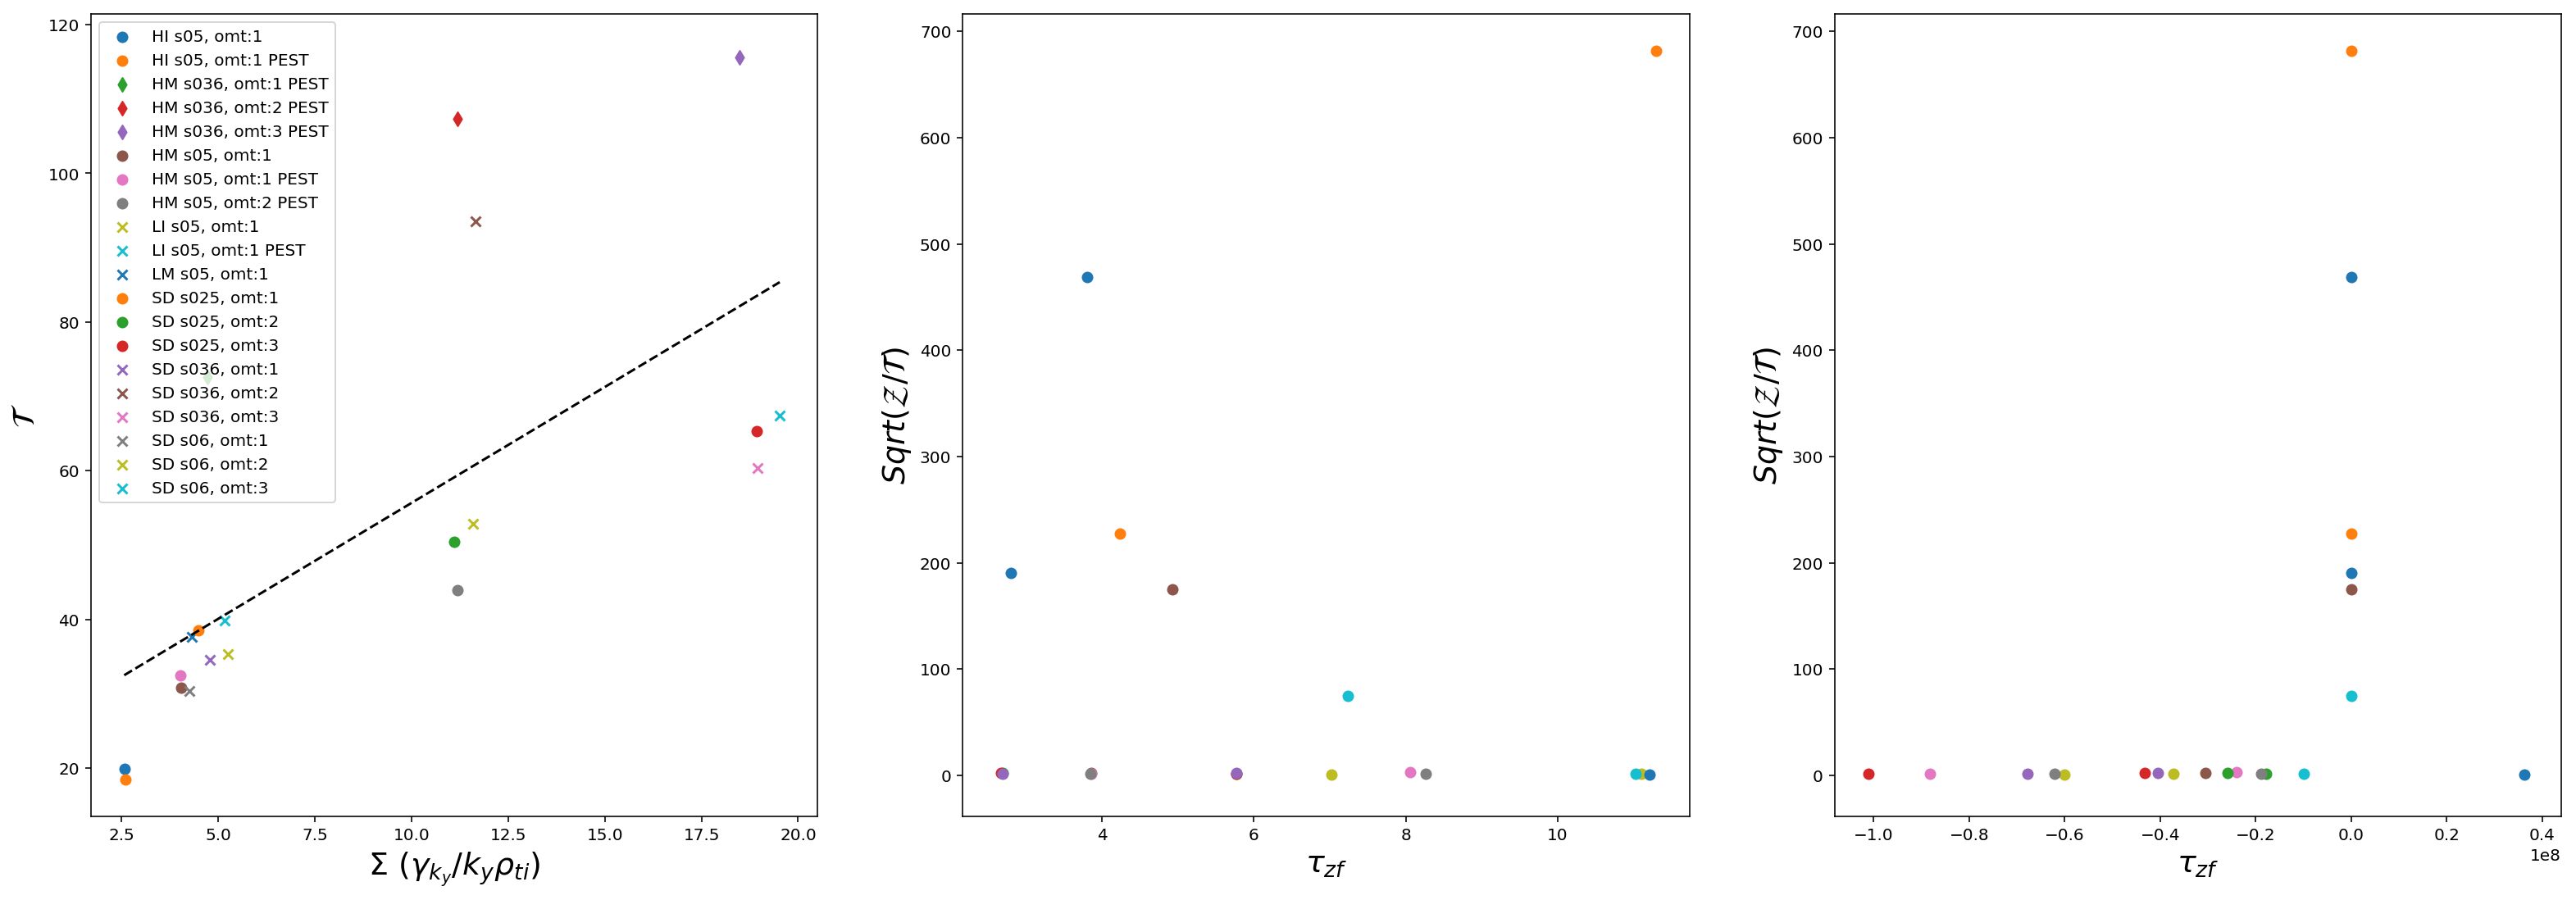

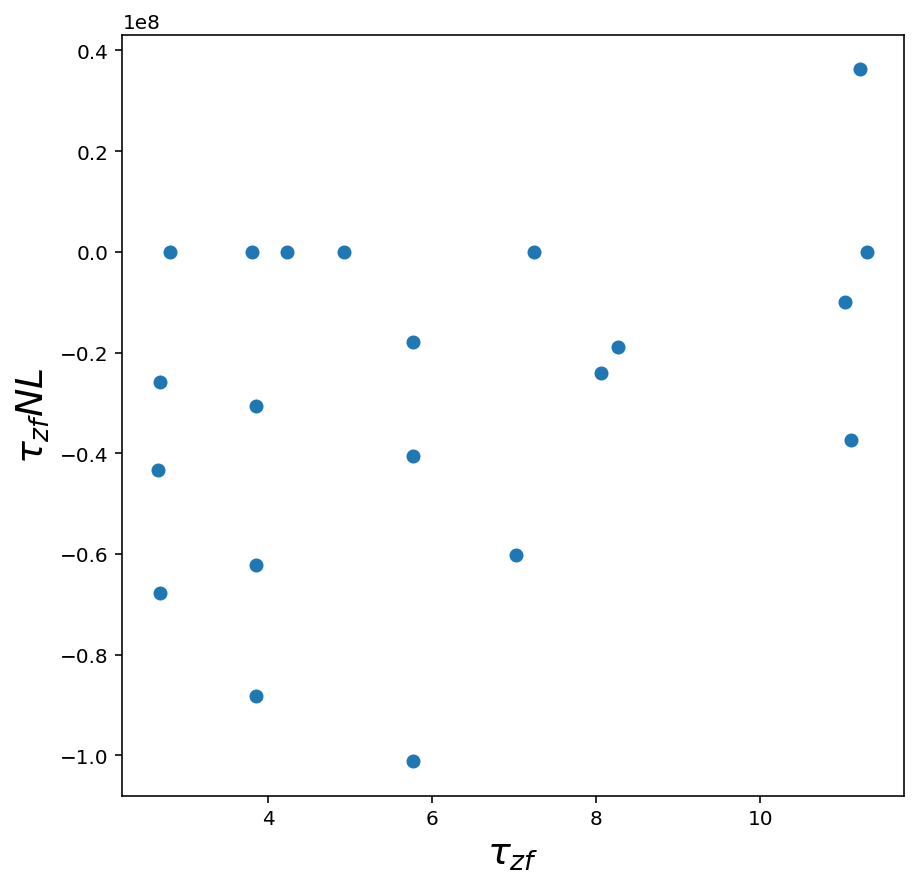

In [6]:
slope_w7x, intercept, r_value, p_value, std_err = stats.linregress(w7x_sigma[np.arange(len(w7x_sigma))!=8], w7x_te[np.arange(len(w7x_te))!=8])
mod2 = Model(line2)
pars = mod2.make_params(intercept=16, slope=8.0)
out = mod2.fit(w7x_te, pars, x=w7x_sigma, nan_policy='propagate')
x = np.linspace(min(w7x_sigma), max(w7x_sigma), len(out.best_fit))
y = line2(x, slope_w7x, intercept)
#print(out.fit_report(min_correl=0.25))

fig = plt.figure(figsize=(27, 9))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(w7x_sigma[0], w7x_te[0], label='HI s05, omt:1')
ax1.scatter(w7x_sigma[1], w7x_te[1], label='HI s05, omt:1 PEST')
ax1.scatter(w7x_sigma[2], w7x_te[2], label='HM s036, omt:1 PEST', marker='d')
ax1.scatter(w7x_sigma[3], w7x_te[3], label='HM s036, omt:2 PEST', marker='d')
ax1.scatter(w7x_sigma[4], w7x_te[4], label='HM s036, omt:3 PEST', marker='d')
ax1.scatter(w7x_sigma[5], w7x_te[5], label='HM s05, omt:1')
ax1.scatter(w7x_sigma[6], w7x_te[6], label='HM s05, omt:1 PEST')
ax1.scatter(w7x_sigma[7], w7x_te[7], label='HM s05, omt:2 PEST')
#ax1.scatter(w7x_sigma[8], w7x_te[8], label='HM s05, omt:3 PEST')
ax1.scatter(w7x_sigma[9], w7x_te[9], label='LI s05, omt:1', marker='x')
ax1.scatter(w7x_sigma[10], w7x_te[10], label='LI s05, omt:1 PEST', marker='x')
ax1.scatter(w7x_sigma[11], w7x_te[11], label='LM s05, omt:1', marker='x')
ax1.scatter(w7x_sigma[12], w7x_te[12], label='SD s025, omt:1')
ax1.scatter(w7x_sigma[13], w7x_te[13], label='SD s025, omt:2')
ax1.scatter(w7x_sigma[14], w7x_te[14], label='SD s025, omt:3')
ax1.scatter(w7x_sigma[15], w7x_te[15], label='SD s036, omt:1', marker='x')
ax1.scatter(w7x_sigma[16], w7x_te[16], label='SD s036, omt:2', marker='x')
ax1.scatter(w7x_sigma[17], w7x_te[17], label='SD s036, omt:3', marker='x')
ax1.scatter(w7x_sigma[18], w7x_te[18], label='SD s06, omt:1', marker='x')
ax1.scatter(w7x_sigma[19], w7x_te[19], label='SD s06, omt:2', marker='x')
ax1.scatter(w7x_sigma[20], w7x_te[20], label='SD s06, omt:3', marker='x')
ax1.plot(x, y, 'k--')

ax1.set_ylabel('$\mathcal{T}$', fontsize=19)
ax1.set_xlabel('$\Sigma \ (\gamma_{k_{y}} / k_{y}\\rho_{ti})$', fontsize=19)
ax1.legend()
#plt.savefig('tau_sum_plot.eps', format='eps', dpi=1200)
print('the slope is:', slope_w7x)

#ax2.scatter(0, w7x_slope[0], label='q0:0.8, omt:6')
#ax2.scatter(1, w7x_slope[1], label='q0:0.8, omt:10')
#ax2.scatter(2, w7x_slope[2], label='q0:1.2, omt:6')
#ax2.scatter(3, w7x_slope[3], label='q0:1.2, omt:10')
#ax2.scatter(4, w7x_slope[4], label='q0:1.7, omt:6')

ax2.scatter(w7x_zf[0], np.sqrt(w7x_zet[0]/w7x_te[0]), label='H Iota s05, omt:1')
ax2.scatter(w7x_zf[1], np.sqrt(w7x_zet[1]/w7x_te[1]), label='H Iota s05, omt:1 PEST')
ax2.scatter(w7x_zf[2], np.sqrt(w7x_zet[2]/w7x_te[2]), label='HM s036, omt:1 PEST')
ax2.scatter(w7x_zf[3], np.sqrt(w7x_zet[3]/w7x_te[3]), label='HM s036, omt:2 PEST')
ax2.scatter(w7x_zf[4], np.sqrt(w7x_zet[4]/w7x_te[4]), label='HM s036, omt:3 PEST')
ax2.scatter(w7x_zf[5], np.sqrt(w7x_zet[5]/w7x_te[5]), label='HM s05, omt:1')
ax2.scatter(w7x_zf[6], np.sqrt(w7x_zet[6]/w7x_te[6]), label='HM s05, omt:1 PEST')
ax2.scatter(w7x_zf[7], np.sqrt(w7x_zet[7]/w7x_te[7]), label='HM s05, omt:2 PEST')
ax2.scatter(w7x_zf[8], np.sqrt(w7x_zet[8]/w7x_te[8]), label='HM s05, omt:3 PEST')
ax2.scatter(w7x_zf[9], np.sqrt(w7x_zet[9]/w7x_te[9]), label='L Iota s05, omt:1')
ax2.scatter(w7x_zf[10], np.sqrt(w7x_zet[10]/w7x_te[10]), label='L Iota s05, omt:1 PEST')
ax2.scatter(w7x_zf[11], np.sqrt(w7x_zet[11]/w7x_te[11]), label='LM s05, omt:1')
ax2.scatter(w7x_zf[12], np.sqrt(w7x_zet[12]/w7x_te[12]), label='SD s025, omt:1')
ax2.scatter(w7x_zf[13], np.sqrt(w7x_zet[13]/w7x_te[13]), label='SD s025, omt:2')
ax2.scatter(w7x_zf[14], np.sqrt(w7x_zet[14]/w7x_te[14]), label='SD s025, omt:3')
ax2.scatter(w7x_zf[15], np.sqrt(w7x_zet[15]/w7x_te[15]), label='SD s036, omt:1')
ax2.scatter(w7x_zf[16], np.sqrt(w7x_zet[16]/w7x_te[16]), label='SD s036, omt:2')
ax2.scatter(w7x_zf[17], np.sqrt(w7x_zet[17]/w7x_te[17]), label='SD s036, omt:3')
ax2.scatter(w7x_zf[18], np.sqrt(w7x_zet[18]/w7x_te[18]), label='SD s06, omt:1')
ax2.scatter(w7x_zf[19], np.sqrt(w7x_zet[19]/w7x_te[19]), label='SD s06, omt:2')
ax2.scatter(w7x_zf[20], np.sqrt(w7x_zet[20]/w7x_te[20]), label='SD s06, omt:3')
ax2.set_ylabel('$Sqrt(\mathcal{Z}/\mathcal{T})$', fontsize=19)
ax2.set_xlabel('$\\tau_{zf}$', fontsize=19)
#ax2.legend()


ax3.scatter(w7x_zf_nl[0], np.sqrt(w7x_zet[0]/w7x_te[0]), label='HI s05, omt:1')
ax3.scatter(w7x_zf_nl[1], np.sqrt(w7x_zet[1]/w7x_te[1]), label='HI s05, omt:1 PEST')
ax3.scatter(w7x_zf_nl[2], np.sqrt(w7x_zet[2]/w7x_te[2]), label='HM s036, omt:1 PEST')
ax3.scatter(w7x_zf_nl[3], np.sqrt(w7x_zet[3]/w7x_te[3]), label='HM s036, omt:2 PEST')
ax3.scatter(w7x_zf_nl[4], np.sqrt(w7x_zet[4]/w7x_te[4]), label='HM s036, omt:3 PEST')
ax3.scatter(w7x_zf_nl[5], np.sqrt(w7x_zet[5]/w7x_te[5]), label='HM s05, omt:1')
ax3.scatter(w7x_zf_nl[6], np.sqrt(w7x_zet[6]/w7x_te[6]), label='HM s05, omt:1 PEST')
ax3.scatter(w7x_zf_nl[7], np.sqrt(w7x_zet[7]/w7x_te[7]), label='HM s05, omt:2 PEST')
ax3.scatter(w7x_zf_nl[8], np.sqrt(w7x_zet[8]/w7x_te[8]), label='HM s05, omt:3 PEST')
ax3.scatter(w7x_zf_nl[9], np.sqrt(w7x_zet[9]/w7x_te[9]), label='LI s05, omt:1')
ax3.scatter(w7x_zf_nl[10], np.sqrt(w7x_zet[10]/w7x_te[10]), label='LI s05, omt:1 PEST')
ax3.scatter(w7x_zf_nl[11], np.sqrt(w7x_zet[11]/w7x_te[11]), label='LM s05, omt:1')
ax3.scatter(w7x_zf_nl[12], np.sqrt(w7x_zet[12]/w7x_te[12]), label='SD s025, omt:1')
ax3.scatter(w7x_zf_nl[13], np.sqrt(w7x_zet[13]/w7x_te[13]), label='SD s025, omt:2')
ax3.scatter(w7x_zf_nl[14], np.sqrt(w7x_zet[14]/w7x_te[14]), label='SD s025, omt:3')
ax3.scatter(w7x_zf_nl[15], np.sqrt(w7x_zet[15]/w7x_te[15]), label='SD s036, omt:1')
ax3.scatter(w7x_zf_nl[16], np.sqrt(w7x_zet[16]/w7x_te[16]), label='SD s036, omt:2')
ax3.scatter(w7x_zf_nl[17], np.sqrt(w7x_zet[17]/w7x_te[17]), label='SD s036, omt:3')
ax3.scatter(w7x_zf_nl[18], np.sqrt(w7x_zet[18]/w7x_te[18]), label='SD s06, omt:1')
ax3.scatter(w7x_zf_nl[19], np.sqrt(w7x_zet[19]/w7x_te[19]), label='SD s06, omt:2')
ax3.scatter(w7x_zf_nl[20], np.sqrt(w7x_zet[20]/w7x_te[20]), label='SD s06, omt:3')

ax3.set_ylabel('$Sqrt(\mathcal{Z}/\mathcal{T})$', fontsize=19)
ax3.set_xlabel('$\\tau_{zf}$', fontsize=19)
#ax3.legend()
plt.show()

w7x = np.sqrt(w7x_zet/w7x_te)
slope_w7x, intercept, r_value, p_value, std_err = stats.linregress(w7x, w7x_zf_nl)

plt.figure(figsize=(7, 7))
plt.scatter(w7x_zf, w7x_zf_nl)

plt.ylabel('$\\tau_{zf} NL$', fontsize=19)
plt.xlabel('$\\tau_{zf}$', fontsize=19)
#plt.savefig('tau_sum_plot.eps', format='eps', dpi=1200)
#print('the slope is:', slope_w7x)
plt.show()

the slope is: 78738.88170603728


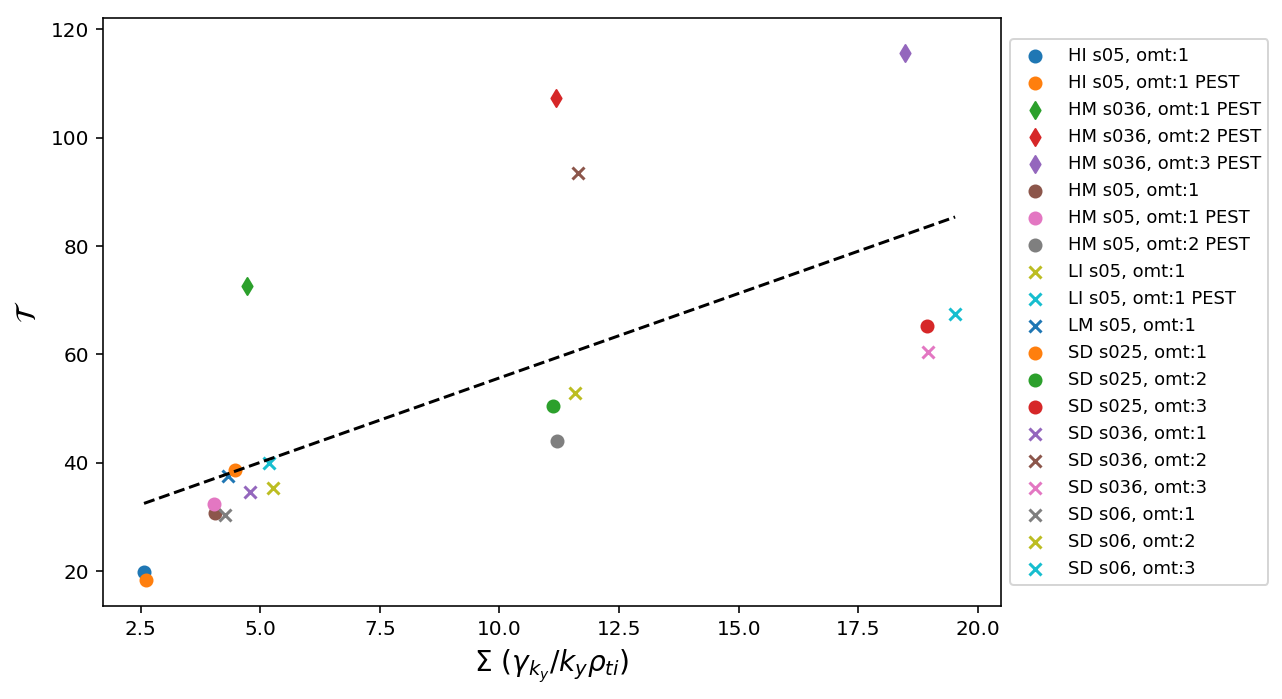

In [10]:
fig = plt.figure(figsize=(9, 5))

ax1 = fig.add_subplot(111)

ax1.scatter(w7x_sigma[0], w7x_te[0], label='HI s05, omt:1')
ax1.scatter(w7x_sigma[1], w7x_te[1], label='HI s05, omt:1 PEST')
ax1.scatter(w7x_sigma[2], w7x_te[2], label='HM s036, omt:1 PEST', marker='d')
ax1.scatter(w7x_sigma[3], w7x_te[3], label='HM s036, omt:2 PEST', marker='d')
ax1.scatter(w7x_sigma[4], w7x_te[4], label='HM s036, omt:3 PEST', marker='d')
ax1.scatter(w7x_sigma[5], w7x_te[5], label='HM s05, omt:1')
ax1.scatter(w7x_sigma[6], w7x_te[6], label='HM s05, omt:1 PEST')
ax1.scatter(w7x_sigma[7], w7x_te[7], label='HM s05, omt:2 PEST')
#ax1.scatter(w7x_sigma[8], w7x_te[8], label='HM s05, omt:3 PEST')
ax1.scatter(w7x_sigma[9], w7x_te[9], label='LI s05, omt:1', marker='x')
ax1.scatter(w7x_sigma[10], w7x_te[10], label='LI s05, omt:1 PEST', marker='x')
ax1.scatter(w7x_sigma[11], w7x_te[11], label='LM s05, omt:1', marker='x')
ax1.scatter(w7x_sigma[12], w7x_te[12], label='SD s025, omt:1')
ax1.scatter(w7x_sigma[13], w7x_te[13], label='SD s025, omt:2')
ax1.scatter(w7x_sigma[14], w7x_te[14], label='SD s025, omt:3')
ax1.scatter(w7x_sigma[15], w7x_te[15], label='SD s036, omt:1', marker='x')
ax1.scatter(w7x_sigma[16], w7x_te[16], label='SD s036, omt:2', marker='x')
ax1.scatter(w7x_sigma[17], w7x_te[17], label='SD s036, omt:3', marker='x')
ax1.scatter(w7x_sigma[18], w7x_te[18], label='SD s06, omt:1', marker='x')
ax1.scatter(w7x_sigma[19], w7x_te[19], label='SD s06, omt:2', marker='x')
ax1.scatter(w7x_sigma[20], w7x_te[20], label='SD s06, omt:3', marker='x')


ax1.plot(x, y, 'k--')

ax1.set_ylabel('$\mathcal{T}$', fontsize=14)
ax1.set_xlabel('$\Sigma \ (\gamma_{k_{y}} / k_{y}\\rho_{ti})$', fontsize=14)
ax1.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
plt.tight_layout()
#plt.savefig('../figs/tau_sum_plot.eps', format='eps', dpi=1200, pad_inches=2)
print('the slope is:', slope_w7x)

In [22]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

the slope is: 9.701904619650733


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


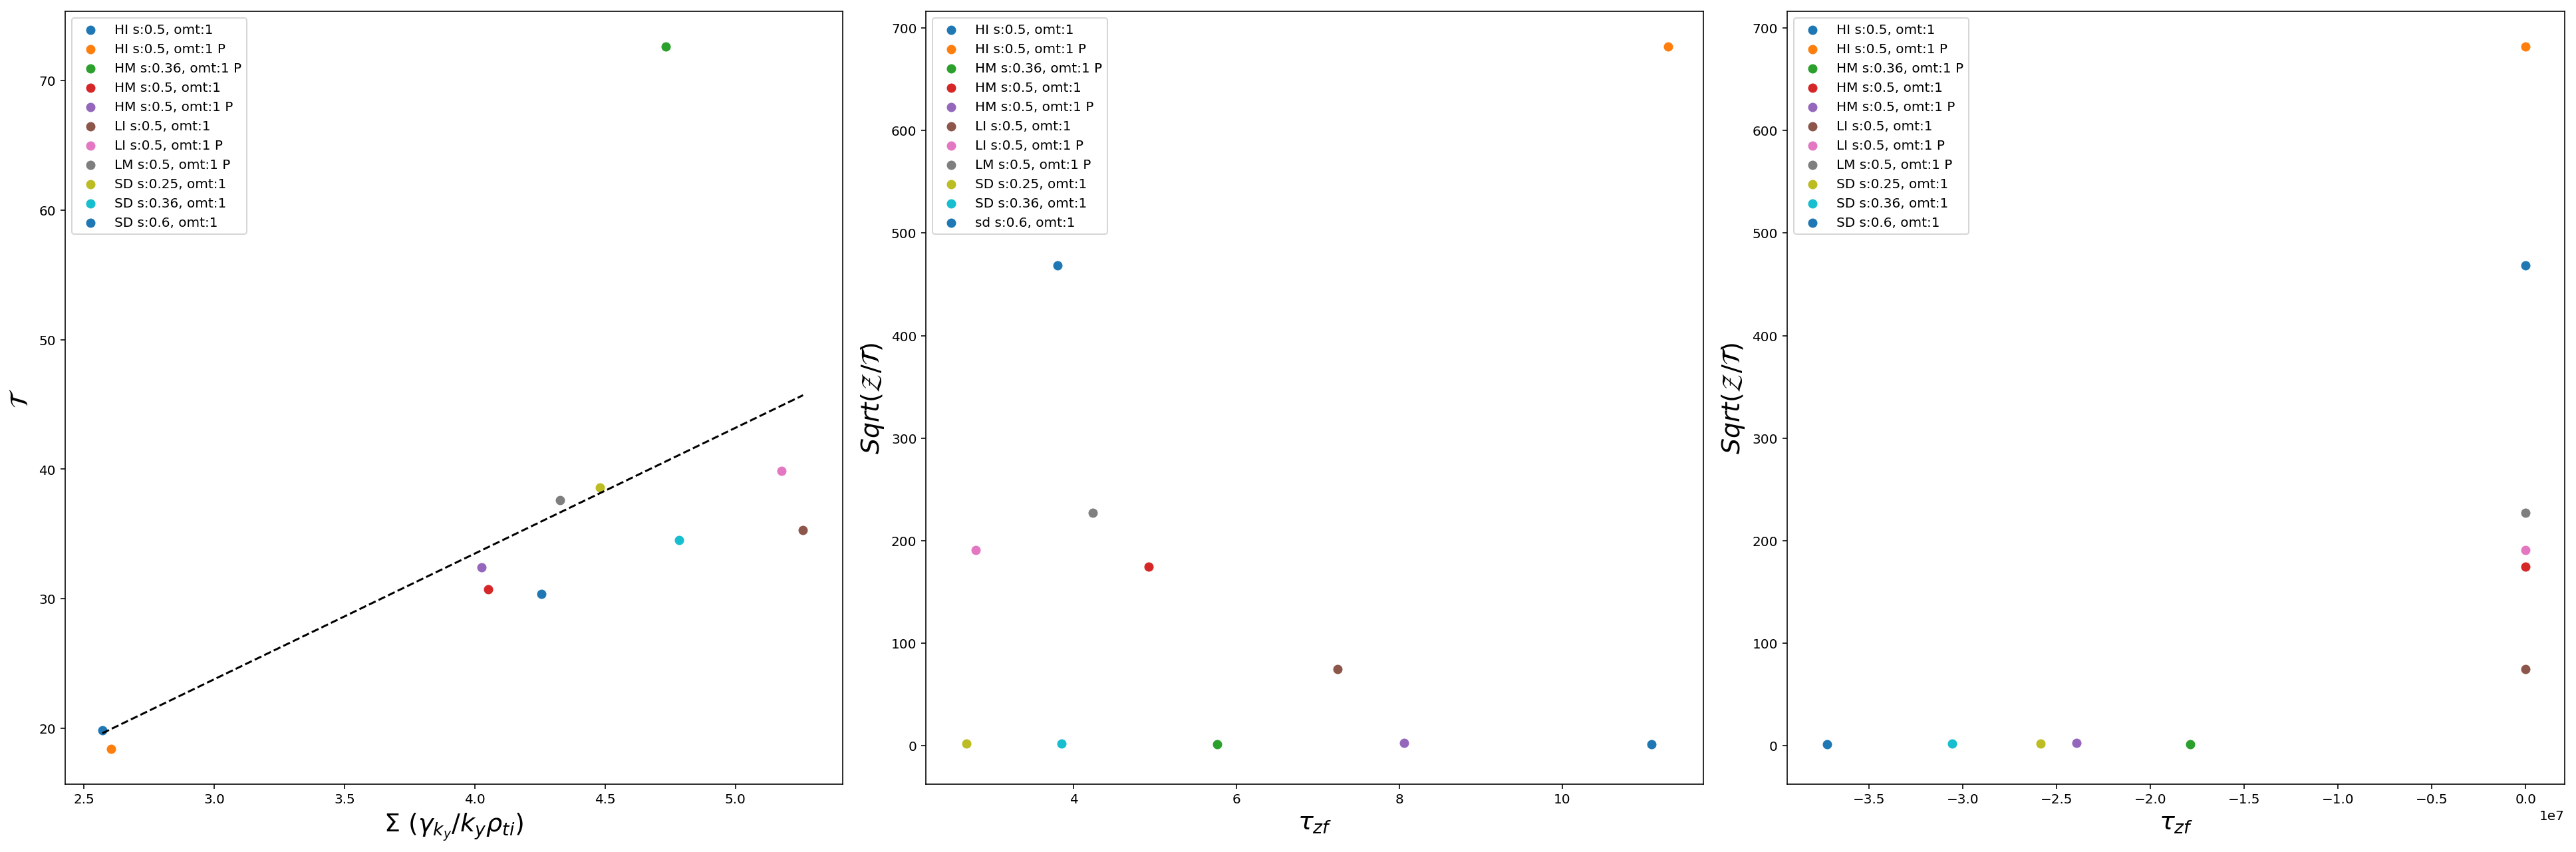

No handles with labels found to put in legend.


the slope is: -912548.9334619535


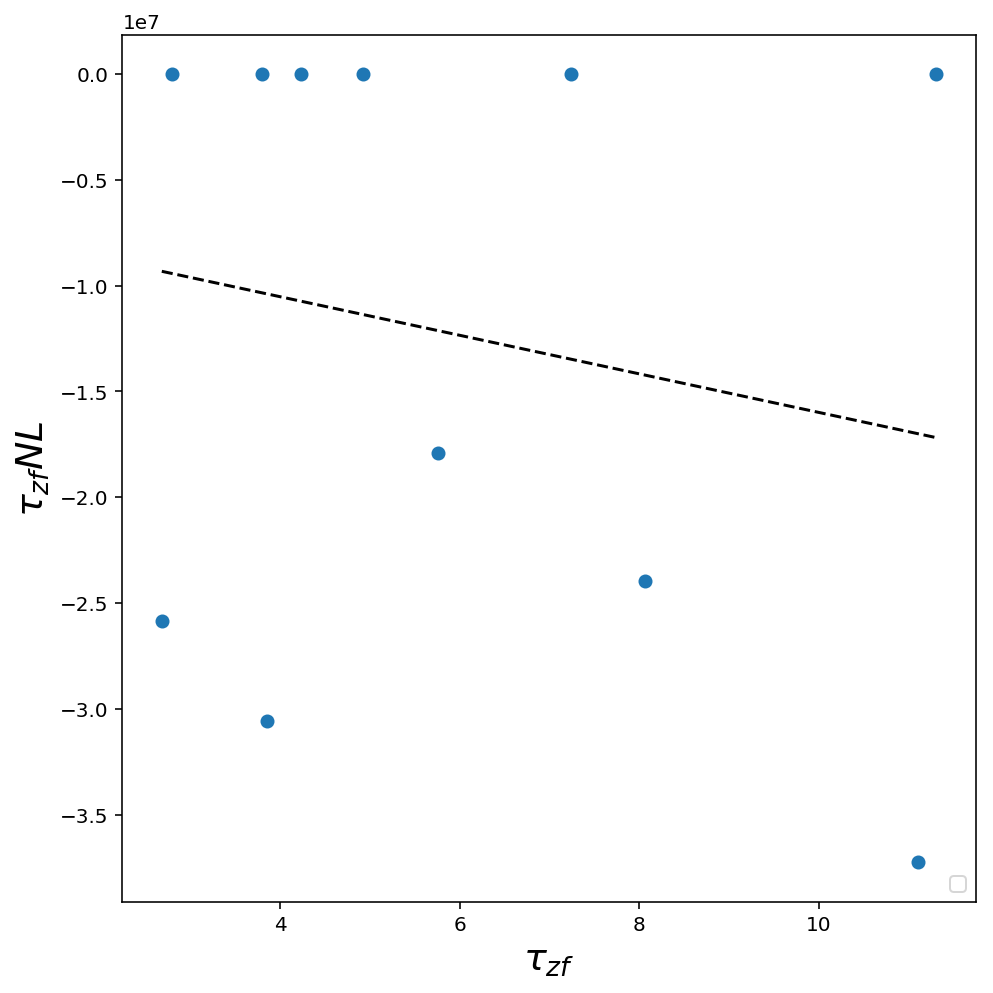

In [12]:
kekky = np.array([0, 1, 2, 5, 6, 9, 10, 11, 12, 15, 18])
slope_w7x, intercept, r_value, p_value, std_err = stats.linregress(w7x_sigma[kekky], w7x_te[kekky])
mod2 = Model(line2)
pars = mod2.make_params(intercept=16, slope=8.0)
out = mod2.fit(w7x_te[kekky], pars, x=w7x_sigma[kekky], nan_policy='propagate')
x = np.linspace(min(w7x_sigma[kekky]), max(w7x_sigma[kekky]), len(out.best_fit))
y = line2(x, slope_w7x, intercept)
#print(out.fit_report(min_correl=0.25))


fig = plt.figure(figsize=(27, 9))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(w7x_sigma[0], w7x_te[0], label='HI s:0.5, omt:1')
ax1.scatter(w7x_sigma[1], w7x_te[1], label='HI s:0.5, omt:1 P')
ax1.scatter(w7x_sigma[2], w7x_te[2], label='HM s:0.36, omt:1 P')
ax1.scatter(w7x_sigma[5], w7x_te[5], label='HM s:0.5, omt:1')
ax1.scatter(w7x_sigma[6], w7x_te[6], label='HM s:0.5, omt:1 P')
ax1.scatter(w7x_sigma[9], w7x_te[9], label='LI s:0.5, omt:1')
ax1.scatter(w7x_sigma[10], w7x_te[10], label='LI s:0.5, omt:1 P')
ax1.scatter(w7x_sigma[11], w7x_te[11], label='LM s:0.5, omt:1 P')
ax1.scatter(w7x_sigma[12], w7x_te[12], label='SD s:0.25, omt:1')
ax1.scatter(w7x_sigma[15], w7x_te[15], label='SD s:0.36, omt:1')
ax1.scatter(w7x_sigma[18], w7x_te[18], label='SD s:0.6, omt:1')
ax1.plot(x, y, 'k--')

ax1.set_ylabel('$\mathcal{T}$', fontsize=19)
ax1.set_xlabel('$\Sigma \ (\gamma_{k_{y}} / k_{y}\\rho_{ti})$', fontsize=19)
ax1.legend()
#plt.savefig('tau_sum_plot.eps', format='eps', dpi=1200)
print('the slope is:', slope_w7x)

ax2.scatter(w7x_zf[0], np.sqrt(w7x_zet[0]/w7x_te[0]), label='HI s:0.5, omt:1')
ax2.scatter(w7x_zf[1], np.sqrt(w7x_zet[1]/w7x_te[1]), label='HI s:0.5, omt:1 P')
ax2.scatter(w7x_zf[2], np.sqrt(w7x_zet[2]/w7x_te[2]), label='HM s:0.36, omt:1 P')
ax2.scatter(w7x_zf[5], np.sqrt(w7x_zet[5]/w7x_te[5]), label='HM s:0.5, omt:1')
ax2.scatter(w7x_zf[6], np.sqrt(w7x_zet[6]/w7x_te[6]), label='HM s:0.5, omt:1 P')
ax2.scatter(w7x_zf[9], np.sqrt(w7x_zet[9]/w7x_te[9]), label='LI s:0.5, omt:1')
ax2.scatter(w7x_zf[10], np.sqrt(w7x_zet[10]/w7x_te[10]), label='LI s:0.5, omt:1 P')
ax2.scatter(w7x_zf[11], np.sqrt(w7x_zet[11]/w7x_te[11]), label='LM s:0.5, omt:1 P')
ax2.scatter(w7x_zf[12], np.sqrt(w7x_zet[12]/w7x_te[12]), label='SD s:0.25, omt:1')
ax2.scatter(w7x_zf[15], np.sqrt(w7x_zet[15]/w7x_te[15]), label='SD s:0.36, omt:1')
ax2.scatter(w7x_zf[18], np.sqrt(w7x_zet[18]/w7x_te[18]), label='sd s:0.6, omt:1')
ax2.set_ylabel('$Sqrt(\mathcal{Z}/\mathcal{T})$', fontsize=19)
ax2.set_xlabel('$\\tau_{zf}$', fontsize=19)
ax2.legend()

ax3.scatter(w7x_zf_nl[0], np.sqrt(w7x_zet[0]/w7x_te[0]), label='HI s:0.5, omt:1')
ax3.scatter(w7x_zf_nl[1], np.sqrt(w7x_zet[1]/w7x_te[1]), label='HI s:0.5, omt:1 P')
ax3.scatter(w7x_zf_nl[2], np.sqrt(w7x_zet[2]/w7x_te[2]), label='HM s:0.36, omt:1 P')
ax3.scatter(w7x_zf_nl[5], np.sqrt(w7x_zet[5]/w7x_te[5]), label='HM s:0.5, omt:1')
ax3.scatter(w7x_zf_nl[6], np.sqrt(w7x_zet[6]/w7x_te[6]), label='HM s:0.5, omt:1 P')
ax3.scatter(w7x_zf_nl[9], np.sqrt(w7x_zet[9]/w7x_te[9]), label='LI s:0.5, omt:1')
ax3.scatter(w7x_zf_nl[10], np.sqrt(w7x_zet[10]/w7x_te[10]), label='LI s:0.5, omt:1 P')
ax3.scatter(w7x_zf_nl[11], np.sqrt(w7x_zet[11]/w7x_te[11]), label='LM s:0.5, omt:1 P')
ax3.scatter(w7x_zf_nl[12], np.sqrt(w7x_zet[12]/w7x_te[12]), label='SD s:0.25, omt:1')
ax3.scatter(w7x_zf_nl[15], np.sqrt(w7x_zet[15]/w7x_te[15]), label='SD s:0.36, omt:1')
ax3.scatter(w7x_zf_nl[18], np.sqrt(w7x_zet[18]/w7x_te[18]), label='SD s:0.6, omt:1')
ax3.set_ylabel('$Sqrt(\mathcal{Z}/\mathcal{T})$', fontsize=19)
ax3.set_xlabel('$\\tau_{zf}$', fontsize=19)
ax3.legend()
plt.show()

slope_w7x, intercept, r_value, p_value, std_err = stats.linregress(w7x_zf[kekky], w7x_zf_nl[kekky])
x = np.linspace(min(w7x_zf[kekky]), max(w7x_zf[kekky]), len(out.best_fit))
y = line2(x, slope_w7x, intercept)

plt.figure(figsize=(7, 7))
plt.scatter(w7x_zf[kekky], w7x_zf_nl[kekky])
plt.ylabel('$\\tau_{zf} NL$', fontsize=19)
plt.xlabel('$\\tau_{zf}$', fontsize=19)
plt.legend(loc='lower right')
#plt.savefig('tau_sum_plot.eps', format='eps', dpi=1200)
print('the slope is:', slope_w7x)
plt.plot(x, y, 'k--')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


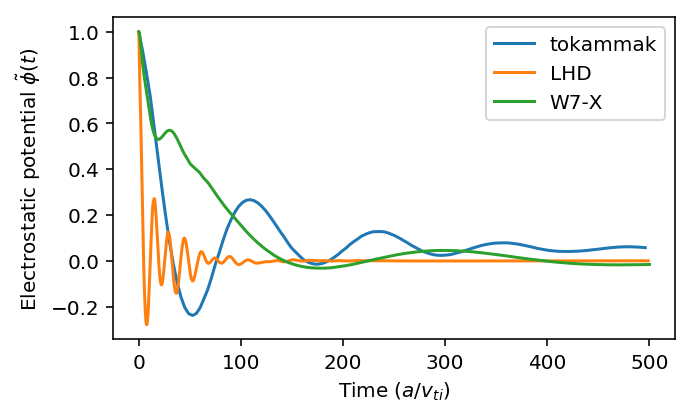

In [23]:
%store -r sa_E
%store -r sa_t
%store -r lhd_E
%store -r lhd_t
%store -r w7x_E
%store -r w7x_t
plt.figure(figsize=(5, 3))
plt.plot(sa_t*20, sa_E, label='tokammak')
plt.plot(lhd_t, lhd_E, label='LHD')
plt.plot(w7x_t, w7x_E, label='W7-X')
plt.xlabel('Time ($a / v_{ti}$)')  # ,fontsize=15)
plt.ylabel('Electrostatic potential $\\tilde{\phi} (t)$')  # ,fontsize=15)
plt.legend()
plt.savefig('../figs/zf_plot.eps', format='eps', dpi=1200)
plt.show()